# Titanic Data Analysis

#### This document examines passenger data from those onboard the Titanic and whether there is a correlation between variables such as sex, age, etc., that led to a higher probability of survival. This will be done by not only examining the data at face value and seeing if there's a higher percentage of females that survived compared to males but also with machine learning. We will establish a model with machine learning for predicting whether a given passenger would have survived the sinking of the Titanic based on variables mentioned above such as age and sex and how much of a role these characteristics played.

#### The data was taken from [Vanderbilt University's Department of Biostatistics](https://hbiostat.org/data/).

First, we begin by importing pandas and numpy since these will be necessary for manipulating the data.

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')

There are some parts in the data that have a '?' where data wasn't available for the individual. Because of this, Pandas can turn this '?' into a value that pandas can understand. A '?' comes up in the **age** and **fare** columns. We will replace the '?' with the numpy **NaN** value.

In [2]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

Next, we will import seaborn to visualize our data along with matploblib to view the correlation between certain columns and how they relate to survivability on the Titanic.

<AxesSubplot:xlabel='survived', ylabel='fare'>

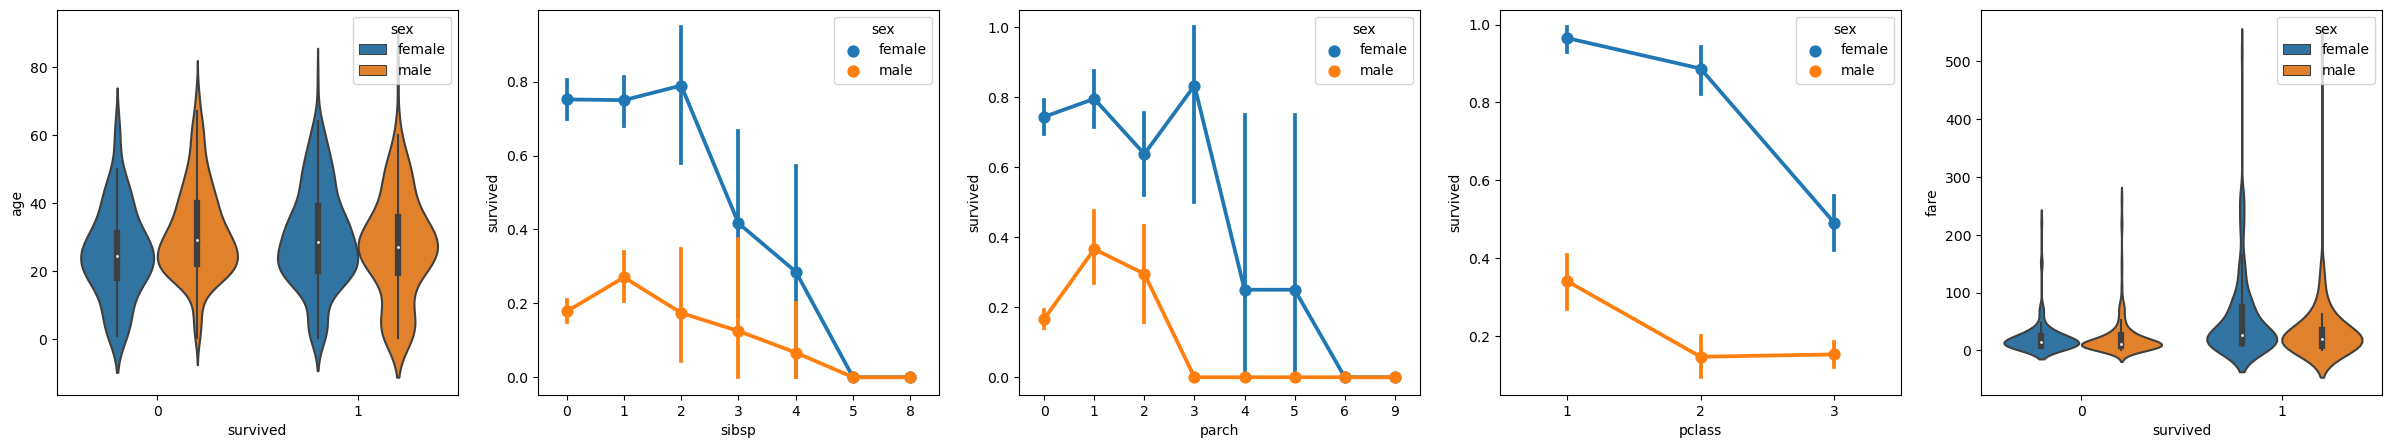

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

We can start to see with the graphs above how the variables relate to the chances of survival. What we can also do is use pandas to calculate correlations. To do so, all the variables within the data need to be in numeric form. The issue is that gender is stored as a string. What we will do is convert the string into integers so that males are represented by the number **1**, and females are represented by the number **0**. 

In [4]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [5]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


The variable names might not be the most intuitive, so I will break down what each one means:

**pclass** = Passenger class.

**survived** = Whether or not the individual survived. 1 meaning they lived.

**sex** = Male or female.

**age** = Age of individual.

**sibsp** = Sibling or spouse related to the individual on board.

**parch** = Parents or children related to the individual on board.

**fare** = Passenger fare in relation to how much the individual payed. 

With the results, the closer each variable is to **1**, the higher the correlation is to survival. We can see this with the variable **survived** being equal to 1. Sex played the biggest role in survival at **0.528693** since it's the closest variable to 1. 

In [6]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


With the code above, what we've done is combined both the **sibsp** and **parch** variables since they fall into the same realm. We're combining them to see whether the combination of them results in a higher correlation of survivability. The chart may look the same as the one before, but at the bottom, you will see there's a new variable added titled **relatives**. This is the result of both **sibsp** and **parch** combined. We can see from the results that relatives are at **0.201719**. This value is quite higher than both **sibsp** and **parch**, which means there's a higher correlation of survival on the Titanic if the person had relatives. Because of this, we will drop from the dataset both the low value **sibsp** and **parch** columns, as well as any rows that had **NaN** values, so that we end up with a dataset that can be used for training a model.

In [7]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

The variables as seen in the above code that will be used to train the model are **sex**, **pclass**, **age**, **relatives**, **fare**, and **survived**.

Next, we will create a model using the **scikit-learn** library since it offers useful helper functions to do pre-processing of the dataset. It also allows us to train a classification model to determine the survivability of passengers on the Titanic, and use the model with test data to determine its accuracy.

First, we will divide up the dataset into training and validation data. This will allow us to use the data we mentioned above to train the model and a portion of the data to test the model. If we use all of our data to train the model, we wouldn't have a way to estimate how well it performs against data the model hasn't seen yet. So, withholding portions of the data from the model is like keeping the correct answers from a student who trained and took the ACT test.

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

Next, we will scale the input values so that they are all treated equally. For example, within the dataset, the values for an age range from 0-100, while gender is only a 1 or 0. By normalizing all of the variables, we can ensure the range of values is all the same.

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

There's various machine learning algorithms we can use to model our data. For this dataset we will use the Naïve Bayes algorithm, a common algorithm for classification problems such as ours.

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Now that we have a trained model, we can compare it with our test data set that we said we were going to hold back from the model. With the code below, we can predict the outcome of the test data and calculate the accuracy of the model.

In [11]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


Looking at the result above, we can see that the trained algorithm had roughly a 75% success rate at estimating survival for individuals on the Titanic when examining the different variables such as age, sex, passenger class, and so on. When looking at the raw numbers, as mentioned before, the sex of the passenger was the biggest deciding factor in survival. From the data set, there is a total of 1,309 passengers. Of the 1,309, 500 survived. There were only a total of 161 male survivors out of the 500, meaning there were 339 female survivors. There were 837 male passengers on board the Titanic, meaning roughly 19.2% of men survived. For females, there were 472 passengers onboard, which equates to roughly a 71.8% survival rate for women. What we can infer from these results is there was more of a focus on women to survive when the Titanic was sinking.